In [10]:
import scipy.io, scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from nltk.tag import pos_tag
import nltk

In [4]:
import time

def gen_clusters(mus):
    STD_DEV = .5
    clusters = np.zeros((NUM_CLUSTERS*VECS_PER_CLUSTER, NUM_VARIABLES))
    for x in range(NUM_CLUSTERS):
        for i in range(VECS_PER_CLUSTER):
            #print(mus[:,x].shape, np.random.randn(NUM_VARIABLES).shape)
            sample = mus[:,x] + np.random.randn(NUM_VARIABLES)*STD_DEV
            clusters[x*VECS_PER_CLUSTER + i] = sample
    return clusters
    
def gen_mus():
    mus = np.random.rand(NUM_VARIABLES, NUM_CLUSTERS)*10
    return mus

NUM_CLUSTERS = 2
VECS_PER_CLUSTER = 10
NUM_VARIABLES = 300
NUM_ITER = 37

#Generates fake "word embedding vectors" 
mus = gen_mus()
clusters = gen_clusters(mus)
clusters = clusters.T
print(clusters.shape)

verse_vecs = clusters #verse_vecs has dimension NUM_VARIABLES x NUM_SAMPLES
num_data_pts = len(verse_vecs[0])

mu_vector = np.mean(verse_vecs, axis=1) #Take the mean across columns
covariance = np.cov(verse_vecs) #Gaussian covariance matrix for data

verse_vecs = verse_vecs - mu_vector.reshape(NUM_VARIABLES,1) #Center the mean of data at zero

(300, 20)


[[ 4.38448452 -3.73462421  0.39686416 -1.12864549  2.26404936]
 [-3.73462421  3.34310303 -0.4120904   1.00262104 -2.06994404]
 [ 0.39686416 -0.4120904   0.32363357 -0.01135719  0.1928111 ]
 [-1.12864549  1.00262104 -0.01135719  0.58392992 -0.63762038]
 [ 2.26404936 -2.06994404  0.1928111  -0.63762038  1.52228913]]
[[ 3.60653283 -2.85345868 -0.35070512 -1.98963368  1.10191433]
 [-2.85345868  2.40101355  0.23542126  1.66233754 -0.9983079 ]
 [-0.35070512  0.23542126  0.31109275  0.27813005 -0.05630507]
 [-1.98963368  1.66233754  0.27813005  1.39788378 -0.55199622]
 [ 1.10191433 -0.9983079  -0.05630507 -0.55199622  0.85018364]]
1
[[ 2.051987   -1.60476276 -0.03032734 -0.8403742   1.0070151 ]
 [-1.60476276  1.39812105 -0.02191371  0.73940698 -0.92202978]
 [-0.03032734 -0.02191371  0.24517945  0.04125609 -0.03713715]
 [-0.8403742   0.73940698  0.04125609  0.54813032 -0.48210615]
 [ 1.0070151  -0.92202978 -0.03713715 -0.48210615  0.84465965]]
[[ 2.05200379 -1.60481385 -0.03031866 -0.84035005 

[[ 2.05199401 -1.60478569 -0.03032333 -0.84036276  1.00704645]
 [-1.60478569  1.39814434 -0.02190284  0.73940417 -0.92206019]
 [-0.03032333 -0.02190284  0.24516571  0.0412605  -0.03713901]
 [-0.84036276  0.73940417  0.0412605   0.54813539 -0.48210756]
 [ 1.00704645 -0.92206019 -0.03713901 -0.48210756  0.84468601]]
[[ 2.05199401 -1.60478569 -0.03032333 -0.84036276  1.00704645]
 [-1.60478569  1.39814434 -0.02190284  0.73940417 -0.92206019]
 [-0.03032333 -0.02190284  0.24516571  0.0412605  -0.03713901]
 [-0.84036276  0.73940417  0.0412605   0.54813539 -0.48210756]
 [ 1.00704645 -0.92206019 -0.03713901 -0.48210756  0.84468601]]
[[ 2.05199401 -1.60478569 -0.03032333 -0.84036276  1.00704645]
 [-1.60478569  1.39814434 -0.02190284  0.73940417 -0.92206019]
 [-0.03032333 -0.02190284  0.24516571  0.0412605  -0.03713901]
 [-0.84036276  0.73940417  0.0412605   0.54813539 -0.48210756]
 [ 1.00704645 -0.92206019 -0.03713901 -0.48210756  0.84468601]]
[[ 2.05199401 -1.60478569 -0.03032333 -0.84036276  1

[[ 2.05199401 -1.60478569 -0.03032333 -0.84036276  1.00704645]
 [-1.60478569  1.39814434 -0.02190284  0.73940417 -0.92206019]
 [-0.03032333 -0.02190284  0.24516571  0.0412605  -0.03713901]
 [-0.84036276  0.73940417  0.0412605   0.54813539 -0.48210756]
 [ 1.00704645 -0.92206019 -0.03713901 -0.48210756  0.84468601]]
[[ 2.05199401 -1.60478569 -0.03032333 -0.84036276  1.00704645]
 [-1.60478569  1.39814434 -0.02190284  0.73940417 -0.92206019]
 [-0.03032333 -0.02190284  0.24516571  0.0412605  -0.03713901]
 [-0.84036276  0.73940417  0.0412605   0.54813539 -0.48210756]
 [ 1.00704645 -0.92206019 -0.03713901 -0.48210756  0.84468601]]
[[ 2.05199401 -1.60478569 -0.03032333 -0.84036276  1.00704645]
 [-1.60478569  1.39814434 -0.02190284  0.73940417 -0.92206019]
 [-0.03032333 -0.02190284  0.24516571  0.0412605  -0.03713901]
 [-0.84036276  0.73940417  0.0412605   0.54813539 -0.48210756]
 [ 1.00704645 -0.92206019 -0.03713901 -0.48210756  0.84468601]]
[[ 2.05199401 -1.60478569 -0.03032333 -0.84036276  1

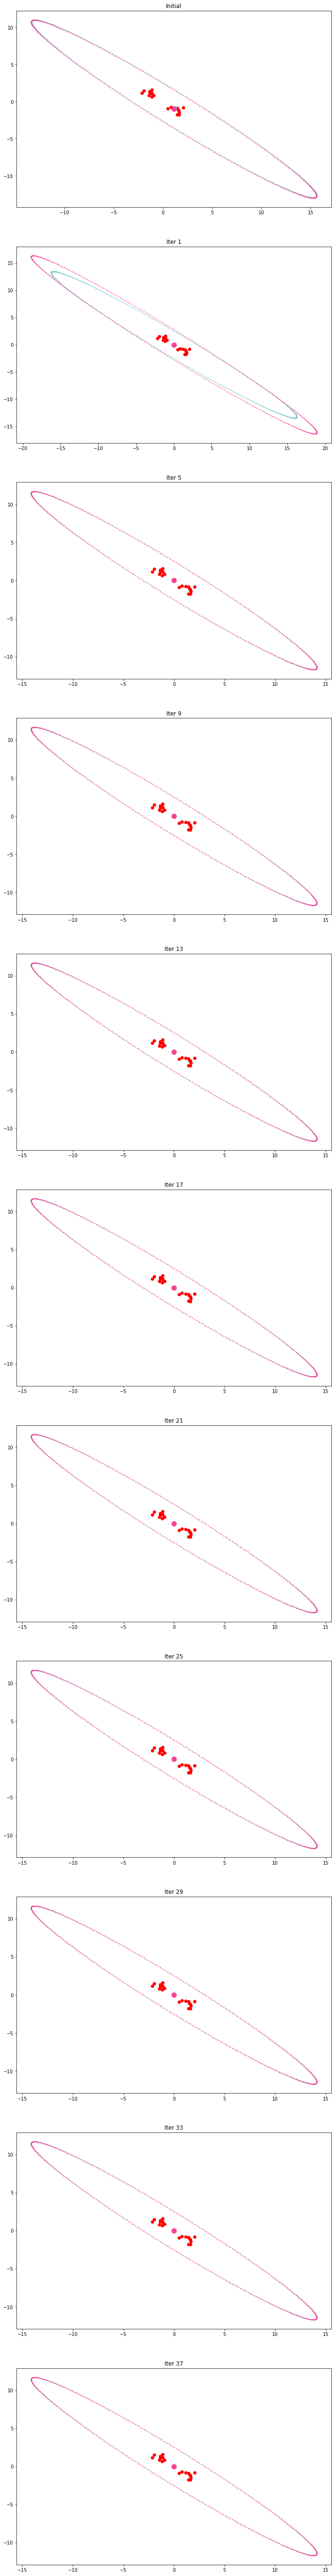

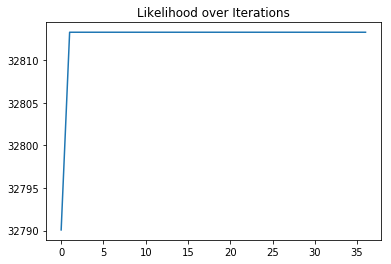

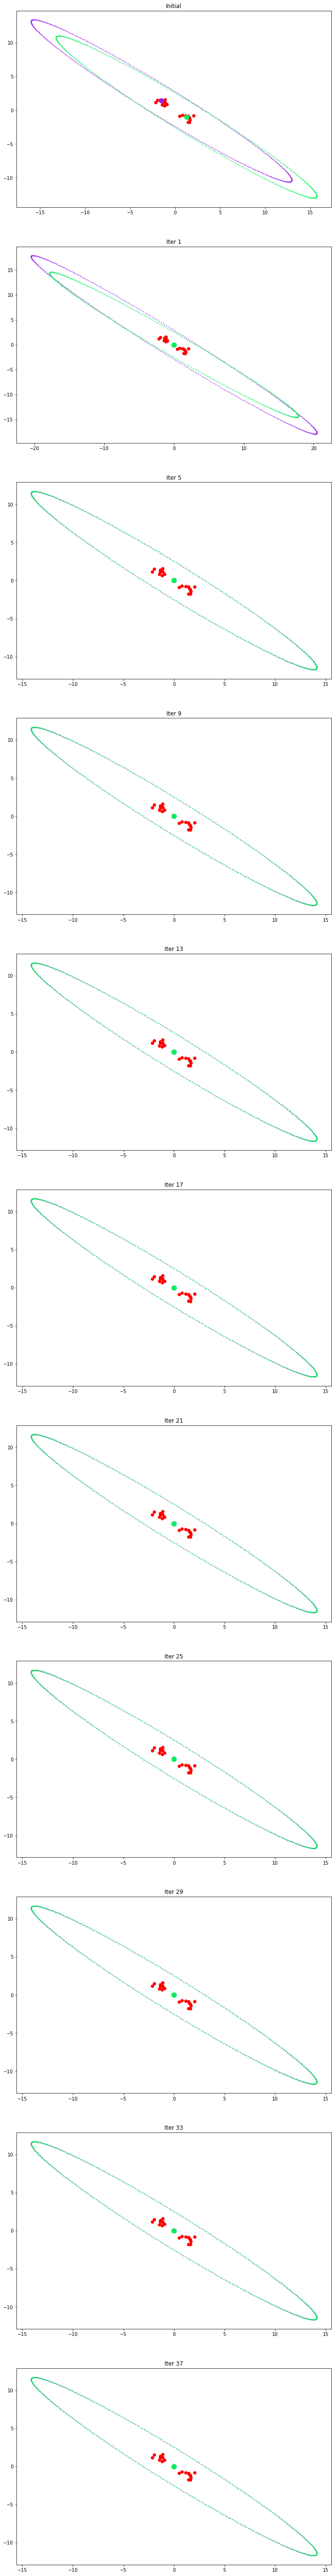

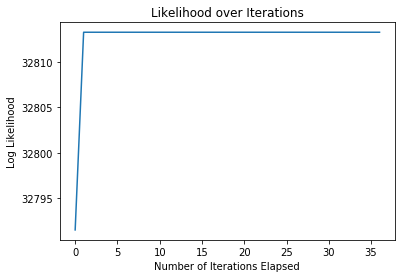

In [9]:
mus = [] #A list of guesses for means of our clusters
for k in range(NUM_CLUSTERS):
    x = np.random.multivariate_normal(np.zeros(NUM_VARIABLES), covariance)
    mus.append(x)
mus = np.asarray(mus).T

covs = [] #A list of guesses for covariances matrices of the clusters
for k in range(NUM_CLUSTERS):
    covs.append(covariance)

# The Gaussian mixing weights
mws = np.random.uniform(.25, .75, NUM_CLUSTERS) # called alpha in the slides
mws = mws / np.sum(mws)

#Define a function to create ellipses based on covariance matrix
def cov_to_pts( cov, NUM_COV_POINTS ):
    circ = np.linspace( 0, 2*np.pi, NUM_COV_POINTS )
    sf = np.asarray( [ np.cos( circ ), np.sin( circ ) ] )
    [u,s,v] = np.linalg.svd( cov )
    pmat = u*2.447*np.sqrt(s) # 95% confidence
    return np.dot(  pmat, sf )

#Define Covariance Ellipses, centering them at Mu
NUM_COV_POINTS = 500
NUM_VARIABLES_PLOTTED = 2
covariances = np.zeros((NUM_CLUSTERS, NUM_VARIABLES_PLOTTED, NUM_COV_POINTS))
for k in range(NUM_CLUSTERS):
    covariances[k, :, :] = cov_to_pts(covs[k][:NUM_VARIABLES_PLOTTED][:NUM_VARIABLES_PLOTTED], NUM_COV_POINTS) + mus[:NUM_VARIABLES_PLOTTED, k].reshape(2, 1)

#Give Points Weights based on mean, covariance, and mixing weights for initial clusters
responsibilities = np.zeros((num_data_pts, NUM_CLUSTERS))
for k in range(NUM_CLUSTERS):
    #print(mus[:,k][:5], "\n", covs[k][:5,:5], "\n", mws[k], "\n")
    #print(scipy.stats.multivariate_normal.pdf(verse_vecs.T, mean=mus[:,k], cov=(covs[k] + .000001*np.eye(NUM_VARIABLES)))*mws[k])
    responsibilities[:, k] = scipy.stats.multivariate_normal.logpdf(verse_vecs.T, mean=mus[:,k], cov=(covs[k] + .000001*np.eye(NUM_VARIABLES)))*mws[k]
#print(responsibilities[:5])
responsibilities = responsibilities / responsibilities.sum(axis=1).reshape(len(verse_vecs[0]), 1)
#print(responsibilities[:5])
#responsibilities = responsibilities**(-1)
#print(responsibilities[:5])
#responsibilities = np.exp(2*responsibilities)
#responsibilities = responsibilities / responsibilities.sum(axis=1).reshape(len(verse_vecs[0]), 1)
#print(responsibilities[:5])
assignments = responsibilities.argmax(axis=1)

#print(assignments)

#Plot Data Points
f, axarr = plt.subplots(nrows=(11), ncols=1, figsize=(12, 100))
axarr[0].scatter(verse_vecs[0,:], verse_vecs[1,:], c='Red')
#axarr[0].scatter(verse_vecs[0,:], verse_vecs[1,:], c=colors)
axarr[0].set_title("Initial")

#Plot cluster means
#rb = np.array(["Red", "Blue"])
colors = np.random.rand(3, NUM_CLUSTERS)
for k in range(NUM_CLUSTERS):
    axarr[0].scatter(mus[0,k], mus[1,k], s=100, c=colors[:,k])

#Plot covariance ellipses for each cluster
for k in range(NUM_CLUSTERS):
    axarr[0].scatter(covariances[k,0,:], covariances[k,1,:], s=1, c=colors[:,k])

likelihoods = []
#ITERATE
#for j in range(NUM_ITER):
for j in range(NUM_ITER):    
    #Update the mixing weights
    mws = responsibilities.sum(axis=0) / num_data_pts
    
    #Update the covariances matrices
    for k in range(NUM_CLUSTERS):
        covs[k] = np.dot(np.transpose((responsibilities[:,k].reshape(num_data_pts,1)) * (verse_vecs.T - mus[:, k])), (verse_vecs.T - mus[:, k]))/((responsibilities[:,k].sum()))
        print(covs[k][0:5,0:5])
        #covs[k] = np.clip(covs[k],.25, 100)
        #print(covs[k][0:5,0:5])
        
    #Update mus
    for k in range(NUM_CLUSTERS):
        mus[:,k] = (responsibilities[:,k].reshape(num_data_pts,1) * verse_vecs.T).sum(axis=0) / responsibilities[:,k].sum()
    
    #Update Covariance Ellipses, centering them at Mu
    covariances = np.zeros((NUM_CLUSTERS, NUM_VARIABLES_PLOTTED, NUM_COV_POINTS))
    for k in range(NUM_CLUSTERS):
        covariances[k, :, :] = cov_to_pts(covs[k][:NUM_VARIABLES_PLOTTED][:NUM_VARIABLES_PLOTTED], NUM_COV_POINTS) + mus[:NUM_VARIABLES_PLOTTED, k].reshape(2, 1)
    
    #Update responsibilities for each cluster
    responsibilities = np.zeros((num_data_pts, NUM_CLUSTERS))
    for k in range(NUM_CLUSTERS):
        responsibilities[:, k] = scipy.stats.multivariate_normal.logpdf(verse_vecs.T, mean=mus[:,k], cov=(covs[k] + .000001*np.eye(NUM_VARIABLES)))*mws[k]
    #print(responsibilities[:5])    
    lik = np.sum(responsibilities)
    likelihoods.append(lik)
    responsibilities = responsibilities / responsibilities.sum(axis=1).reshape(len(verse_vecs[0]), 1)
    
    #Plot every fourth iteration
    if (j % 4 == 0):
        #rint(j)
        index = int(j/4 + .5) + 1
        print(index)
        #Plot Data Points
        axarr[index].scatter(verse_vecs[0,:], verse_vecs[1,:], c='red')
        title = "Iter " + str(j + 1)
        axarr[index].set_title(title)
        #Plot covariance ellipses for each cluster
        for k in range(NUM_CLUSTERS):
            axarr[index].scatter(covariances[k,0,:], covariances[k,1,:], s=1, c=colors[:,k])
            #Plot cluster means
            axarr[index].scatter(mus[0,k], mus[1,k], s=100, c=colors[:,k])
            
plt.savefig("High_dim_EM.png", dpi=150)

fig, ax = plt.subplots(1,1)
ax.plot(np.arange(NUM_ITER), likelihoods)
plt.gca().set_title("Likelihood over Iterations")
plt.gca().set_ylabel("Log Likelihood")
plt.gca().set_xlabel("Number of Iterations Elapsed")
plt.show()